In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
df = pd.read_csv('/Users/feliperodriguez/Library/CloudStorage/OneDrive-BellevueUniversity/Term Project/Datasets/sales_data.csv')

In [74]:
df.head()

,Order Date,Order ID,Product,Product_ean,catégorie,Purchase Address,Quantity Ordered,Price Each,Cost price,turnover,margin
0,2019-01-22 21:25:00,141234,iPhone,5.638009e+12,Vêtements,"944 Walnut St, Boston, MA 02215",1,700.00,231.0000,700.00,469.0000
1,2019-01-28 14:15:00,141235,Lightning Charging Cable,5.563320e+12,Alimentation,"185 Maple St, Portland, OR 97035",1,14.95,7.4750,14.95,7.4750
2,2019-01-17 13:33:00,141236,Wired Headphones,2.113973e+12,Vêtements,"538 Adams St, San Francisco, CA 94016",2,11.99,5.9950,23.98,11.9900
3,2019-01-05 20:33:00,141237,27in FHD Monitor,3.069157e+12,Sports,"738 10th St, Los Angeles, CA 90001",1,149.99,97.4935,149.99,52.4965
4,2019-01-25 11:59:00,141238,Wired Headphones,9.692681e+12,Électronique,"387 10th St, Austin, TX 73301",1,11.99,5.9950,11.99,5.9950


In [75]:
df.dtypes

Order Date           object
Order ID              int64
Product              object
Product_ean         float64
catégorie            object
Purchase Address     object
Quantity Ordered      int64
Price Each          float64
Cost price          float64
turnover            float64
margin              float64
dtype: object

In [76]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [77]:
df.dtypes

Order Date          datetime64[ns]
Order ID                     int64
Product                     object
Product_ean                float64
catégorie                   object
Purchase Address            object
Quantity Ordered             int64
Price Each                 float64
Cost price                 float64
turnover                   float64
margin                     float64
dtype: object

In [78]:
df = df.drop(columns=['Order ID', 'Product_ean'])

In [79]:
items_sold = df['Product'].groupby(df['Product']).count().sort_values()

In [80]:
items_sold

Product
LG Dryer                        646
LG Washing Machine              666
Vareebadd Phone                2065
20in Monitor                   4101
ThinkPad Laptop                4128
Macbook Pro Laptop             4724
Flatscreen TV                  4800
Google Phone                   5525
34in Ultrawide Monitor         6181
27in 4K Gaming Monitor         6230
iPhone                         6842
27in FHD Monitor               7507
Bose SoundSport Headphones    13325
Apple Airpods Headphones      15549
Wired Headphones              18882
AA Batteries (4-pack)         20577
AAA Batteries (4-pack)        20641
Lightning Charging Cable      21658
USB-C Charging Cable          21903
Name: Product, dtype: int64

Text(0.5, 1.0, 'Number of items sold')

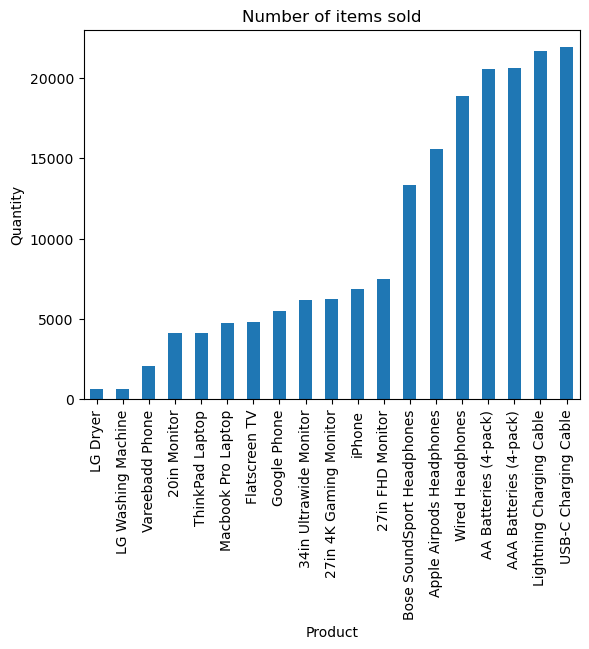

In [81]:
items_sold.plot(kind='bar')
plt.ylabel('Quantity')
plt.title('Number of items sold')

In [82]:
sum_sold = df['margin'].groupby(df['Product']).sum().sort_values()

In [83]:
sum_sold

Product
AAA Batteries (4-pack)        4.637042e+04
AA Batteries (4-pack)         5.305920e+04
Wired Headphones              1.232392e+05
USB-C Charging Cable          1.432506e+05
20in Monitor                  1.589520e+05
Lightning Charging Cable      1.735471e+05
LG Dryer                      2.596920e+05
LG Washing Machine            2.677320e+05
27in FHD Monitor              3.963486e+05
Vareebadd Phone               5.542240e+05
Bose SoundSport Headphones    6.727827e+05
Apple Airpods Headphones      8.222025e+05
Flatscreen TV                 9.686190e+05
34in Ultrawide Monitor        1.578224e+06
27in 4K Gaming Monitor        1.631515e+06
Google Phone                  2.223864e+06
ThinkPad Laptop               2.767072e+06
iPhone                        3.212181e+06
Macbook Pro Laptop            5.385192e+06
Name: margin, dtype: float64

Text(0.5, 1.0, 'Total of items sold')

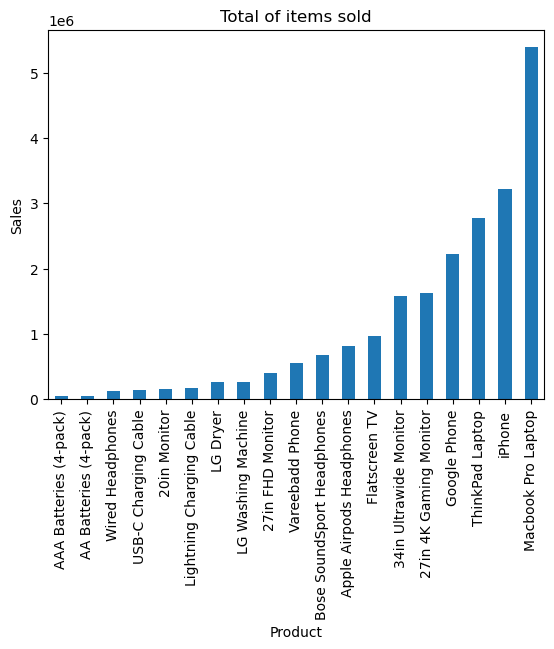

In [84]:
sum_sold.plot(kind='bar')
plt.ylabel('Sales')
plt.title('Total of items sold')

In [2]:
daily_margin = df.groupby(df['Order Date'].dt.date)['margin'].sum().reset_index()

daily_margin.plot()

# Adding labels and title to the graph
plt.xlabel('Order Date')
plt.ylabel('Sum of Margin')
plt.title('Sum of Margin by Day')

# Displaying the graph
plt.show()

NameError: name 'df' is not defined

In [1]:
daily_margin

NameError: name 'daily_margin' is not defined

<Figure size 3120x600 with 0 Axes>

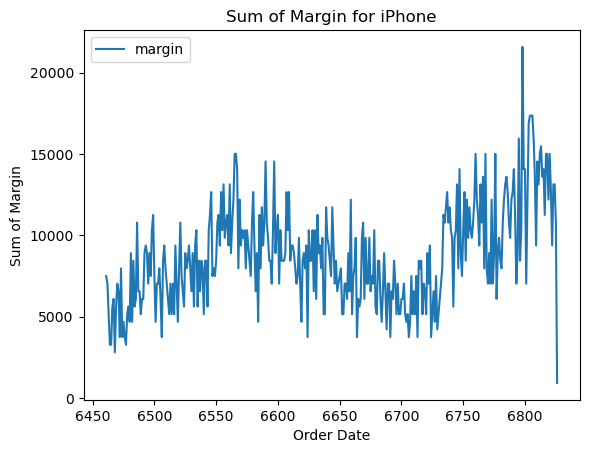

<Figure size 3660x600 with 0 Axes>

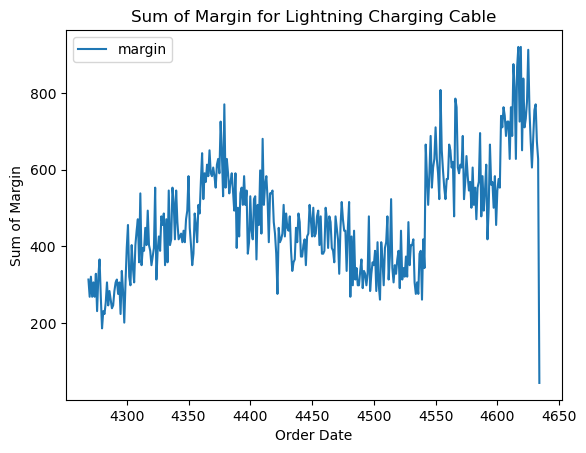

<Figure size 3660x600 with 0 Axes>

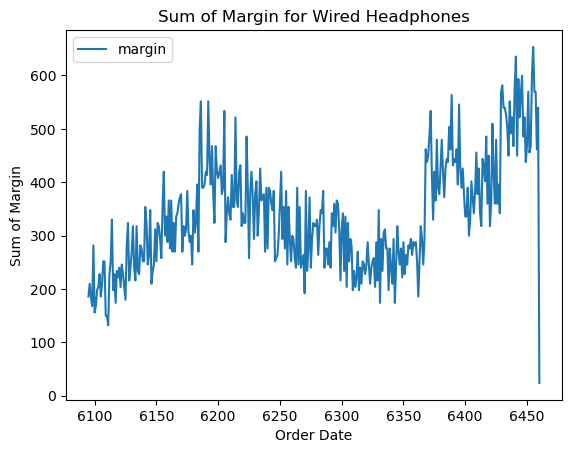

<Figure size 3660x600 with 0 Axes>

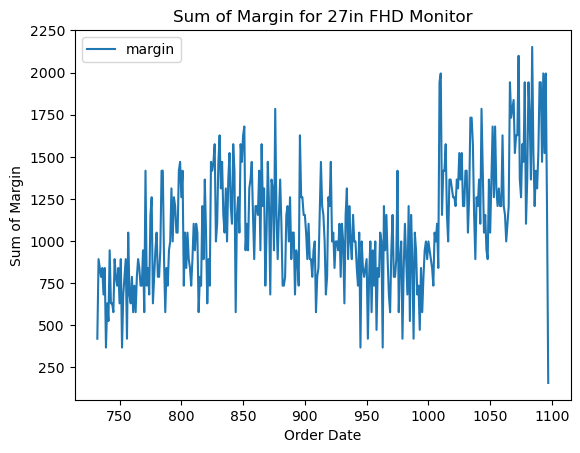

<Figure size 3660x600 with 0 Axes>

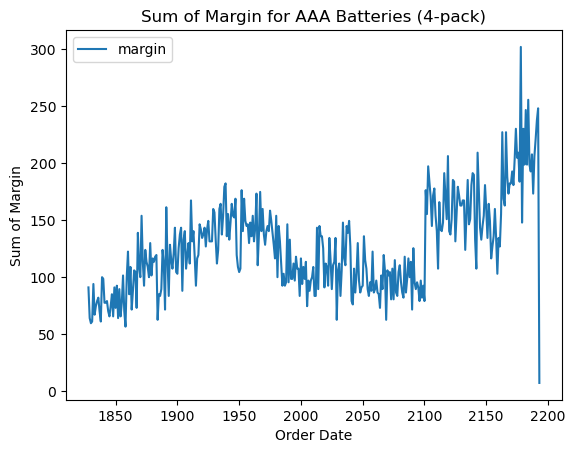

<Figure size 3660x600 with 0 Axes>

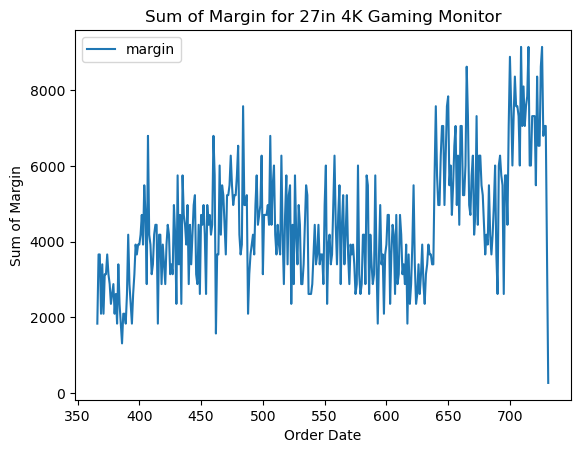

<Figure size 3660x600 with 0 Axes>

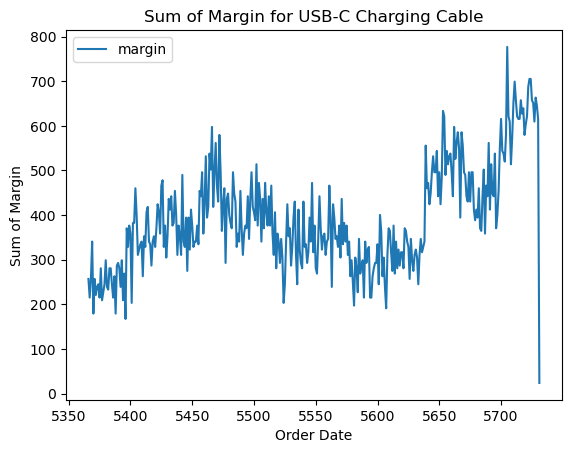

<Figure size 3660x600 with 0 Axes>

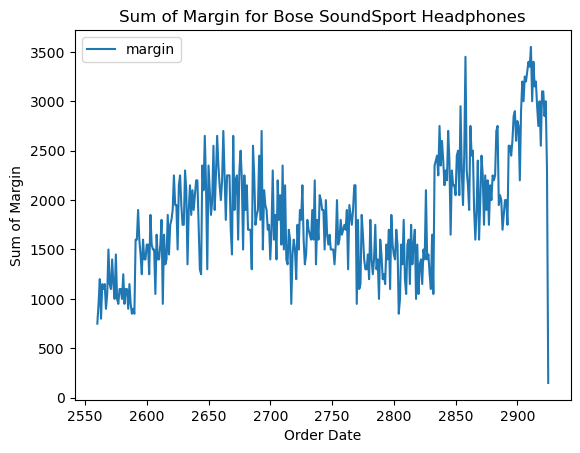

<Figure size 3660x600 with 0 Axes>

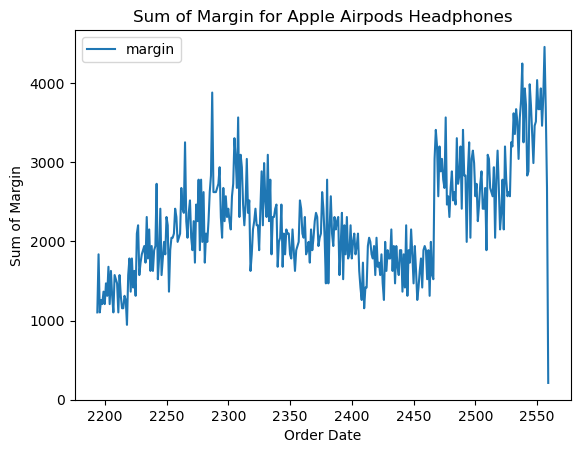

<Figure size 3660x600 with 0 Axes>

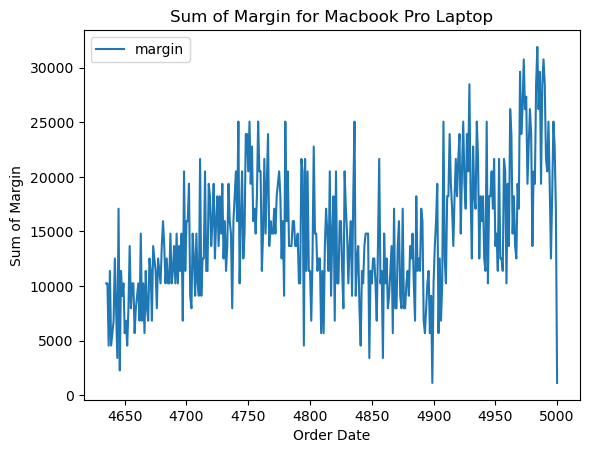

<Figure size 3660x600 with 0 Axes>

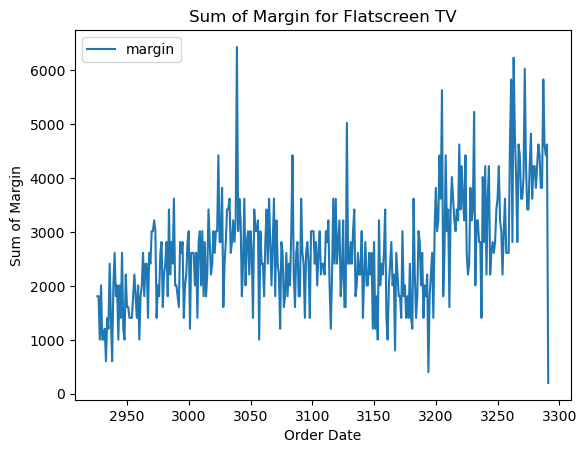

<Figure size 3660x600 with 0 Axes>

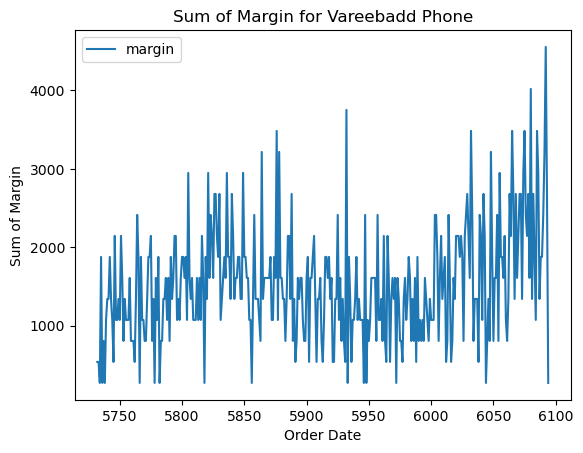

<Figure size 3630x600 with 0 Axes>

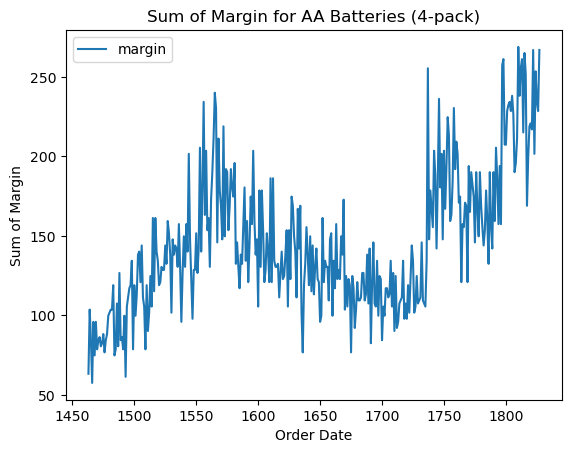

<Figure size 3650x600 with 0 Axes>

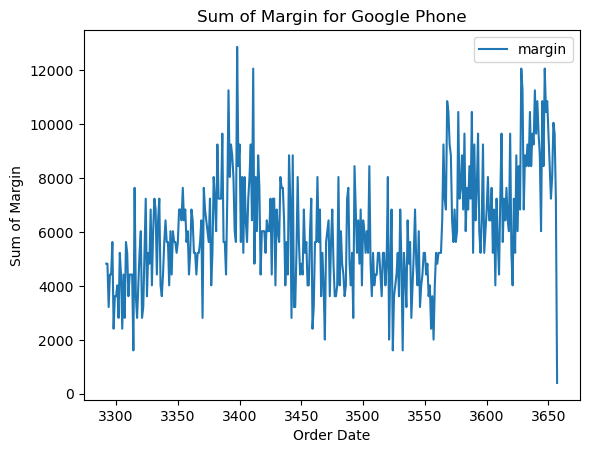

<Figure size 3660x600 with 0 Axes>

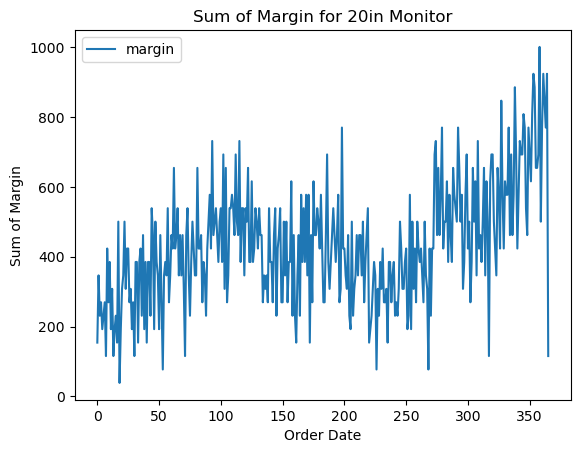

<Figure size 3660x600 with 0 Axes>

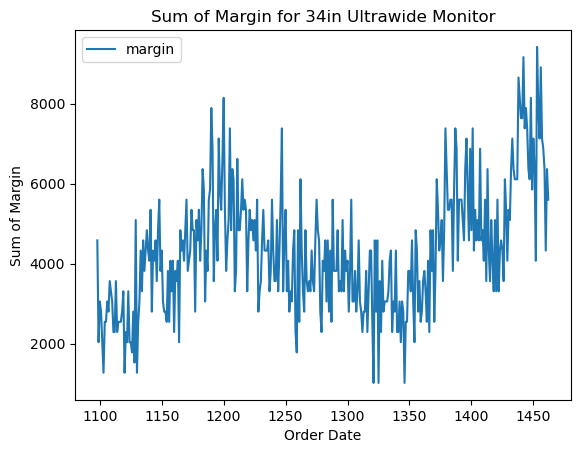

<Figure size 3650x600 with 0 Axes>

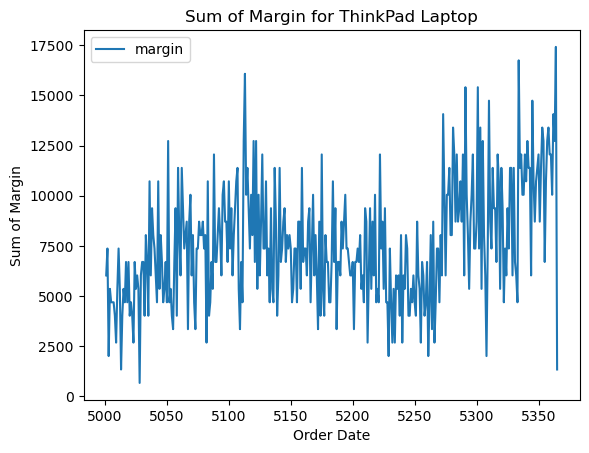

<Figure size 3650x600 with 0 Axes>

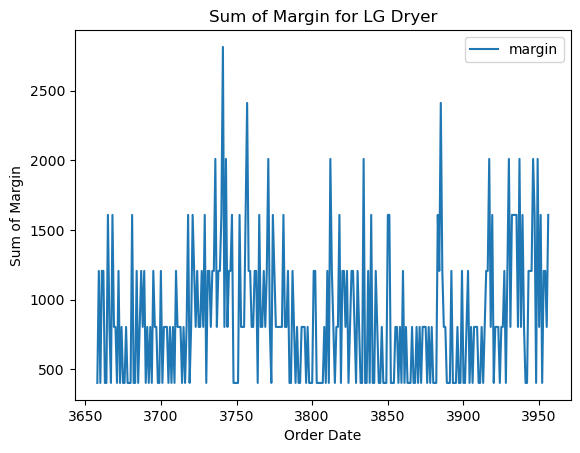

<Figure size 2990x600 with 0 Axes>

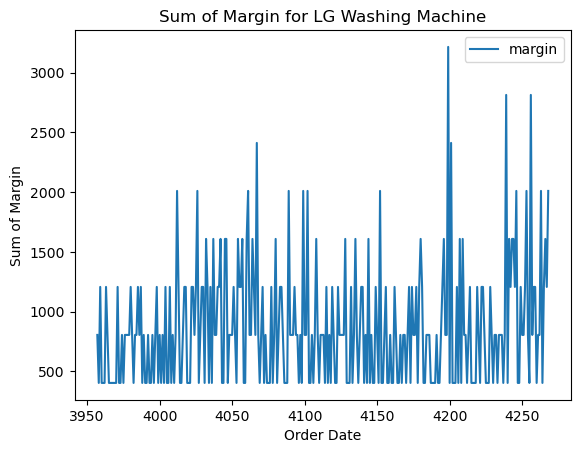

In [92]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the dataset is stored in a pandas DataFrame called 'df'
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Grouping the data by product and day, and calculating the sum of the 'margin' column
product_margin = df.groupby(['Product', df['Order Date'].dt.date])['margin'].sum().reset_index()

# Creating a graph for each product
for product in df['Product'].unique():
    product_data = product_margin[product_margin['Product'] == product]
    product_data.plot()
    plt.xlabel('Order Date')
    plt.ylabel('Sum of Margin')
    plt.title(f'Sum of Margin for {product}')
    plt.show()